In [1]:
%pylab inline
import pandas as pd
import scanpy as sc

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
def postprocess(adata,view=True):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata)
    adata.raw = adata
    adata = adata[:, adata.var.highly_variable]
    print('after select HVG',adata.shape)
    sc.pp.scale(adata)
    sc.tl.pca(adata)
    sc.pp.neighbors(adata)
    if view:
        sc.tl.tsne(adata)
        sc.tl.umap(adata)
    return adata

def cluster_k_leiden(embadata,n_cluster):
    max_steps=120
    this_step = 0
    this_min = 0
    this_max = 2
    print('reference cluster number',n_cluster)
    while this_step < max_steps:
        this_resolution = this_min + ((this_max-this_min)/2)
        sc.tl.leiden(embadata,resolution=this_resolution,random_state=42)
        this_clusters = embadata.obs['leiden'].nunique()
        if this_clusters > n_cluster:
            this_max = this_resolution
        elif this_clusters < n_cluster:
            this_min = this_resolution
        else:break
        this_step+=1
    if this_step==max_steps:
        print('Cannot find the number of clusters')
        print('Use resolution',this_resolution)
    else:
        print('use resolution',this_resolution)
     # leiden
    sc.tl.leiden(embadata,resolution=this_resolution,random_state=42,key_added=f'cluster_{n_cluster}')

In [4]:
refdf = pd.read_csv('baron_human_ref_19264_fromsaver_fromscfoundation.csv',index_col=0)
sampledf = pd.read_csv('baron_human_ref_19264_fromsaver.csv',index_col=0)

In [ ]:
# import scanpy as sc
# tmp2adata = sc.AnnData(refdf)
# sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True)
# figsize(4,3)
# sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
#              jitter=0.4, multi_panel=True)


In [ ]:
# # ref
# import scanpy as sc
# tmp2adata = sc.AnnData(sampledf)
# #去掉tmp2adata中总和超过的细胞
# print('before filter',tmp2adata.shape)
# tmp2adata = tmp2adata[tmp2adata.X.sum(axis=1)<5000]
# print('after filter',tmp2adata.shape)
# sc.pp.calculate_qc_metrics(tmp2adata,percent_top=None, log1p=False, inplace=True)
# figsize(4,3)
# sc.pl.violin(tmp2adata, ['n_genes_by_counts', 'total_counts'],
#              jitter=0.8, multi_panel=True)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
before filter (2284, 1076)
after filter (2109, 1076)


/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/scanpy/preprocessing/_qc.py:144: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


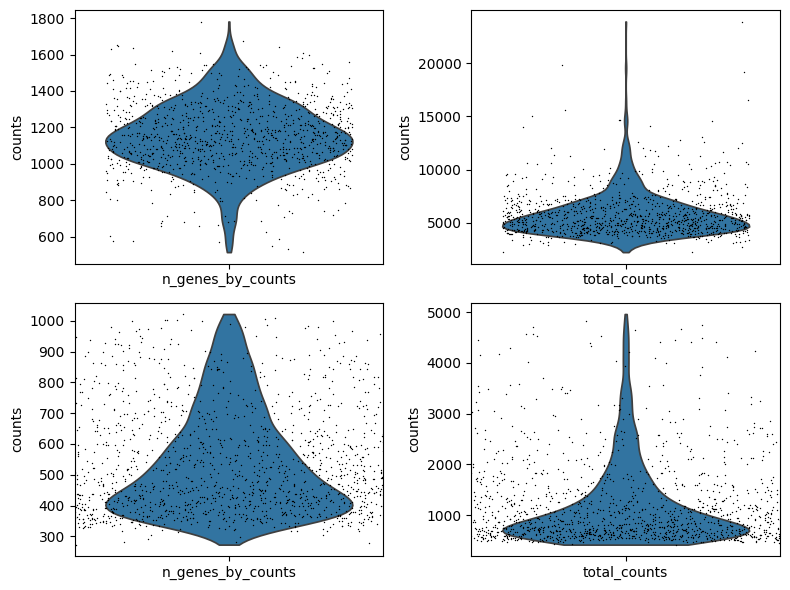

In [5]:
%pylab inline
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 创建2×2的图表
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# 处理参考数据集
tmp_ref = sc.AnnData(refdf)
sc.pp.calculate_qc_metrics(tmp_ref, percent_top=None, log1p=False, inplace=True)

# 参考数据集的表达基因数量小提琴图
sc.pl.violin(tmp_ref, 'n_genes_by_counts', jitter=0.4, show=False, ax=axs[0, 0], ylabel='counts')

# 参考数据集的表达总量小提琴图
sc.pl.violin(tmp_ref, 'total_counts', jitter=0.4, show=False, ax=axs[0, 1], ylabel='counts')

# 处理样本数据集
tmp_sample = sc.AnnData(sampledf)
print('before filter', tmp_sample.shape)
tmp_sample = tmp_sample[tmp_sample.X.sum(axis=1) < 5000]
print('after filter', tmp_sample.shape)
sc.pp.calculate_qc_metrics(tmp_sample, percent_top=None, log1p=False, inplace=True)

# 样本数据集的表达基因数量小提琴图
sc.pl.violin(tmp_sample, 'n_genes_by_counts', jitter=0.8, show=False, ax=axs[1, 0], ylabel='counts')

# 样本数据集的表达总量小提琴图
sc.pl.violin(tmp_sample, 'total_counts', jitter=0.8, show=False, ax=axs[1, 1], ylabel='counts')
# 调整布局
plt.tight_layout()

# 保存为SVG格式
plt.savefig('qc_metrics_comparison.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
refAdata = sc.AnnData(refdf)
refAdata = postprocess(refAdata,True)

sampleAdata = sc.AnnData(sampledf)
sampleAdata = postprocess(sampleAdata,True)

after select HVG (1076, 432)


/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


after select HVG (2284, 241)


/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/scanpy/preprocessing/_scale.py:317: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/tmp/ipykernel_3014541/1521299806.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(refAdata,resolution=0.7)


7


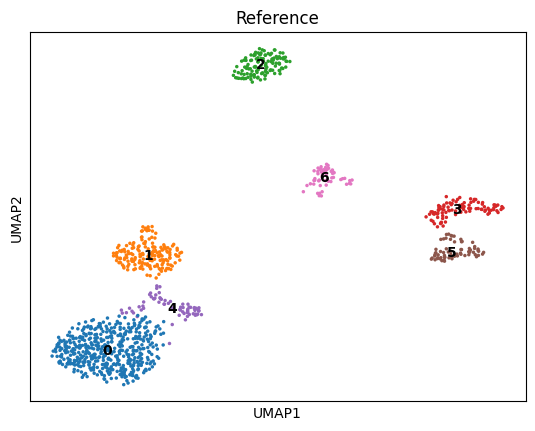

In [7]:
sc.tl.leiden(refAdata,resolution=0.7)
numcls = refAdata.obs.leiden.unique().shape[0]
print(numcls)
sc.pl.umap(refAdata,color=[f'leiden'],size=25,title='Reference',legend_loc='on data')

In [8]:
cluster_k_leiden(sampleAdata,numcls)

reference cluster number 7
use resolution 0.75


In [9]:
adatalist = [sampleAdata]
for tmpadata in adatalist:
    tmpadata.obs['refleiden']=refAdata.obs['leiden']

In [10]:
imputeemb = np.load(f'baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres5_embedding.npy')
#这里维度不一样，暴力对齐了下
imputeemb_df = pd.DataFrame(imputeemb, index=refdf.index[:imputeemb.shape[0]])
imputeemb_df = imputeemb_df.reindex(refdf.index, fill_value=0)
imputeAdata = sc.AnnData(imputeemb_df)
# imputeAdata = sc.AnnData(pd.DataFrame(imputeemb,index=refdf.index))
sc.pp.scale(imputeAdata)
sc.tl.pca(imputeAdata)
sc.pp.neighbors(imputeAdata)

sc.tl.tsne(imputeAdata)
sc.tl.umap(imputeAdata)

cluster_k_leiden(imputeAdata,numcls)
imputeAdata.obs['refleiden']=refAdata.obs['leiden']

/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.5


<Axes: title={'center': 'Embedding projected to Reference'}, xlabel='UMAP1', ylabel='UMAP2'>

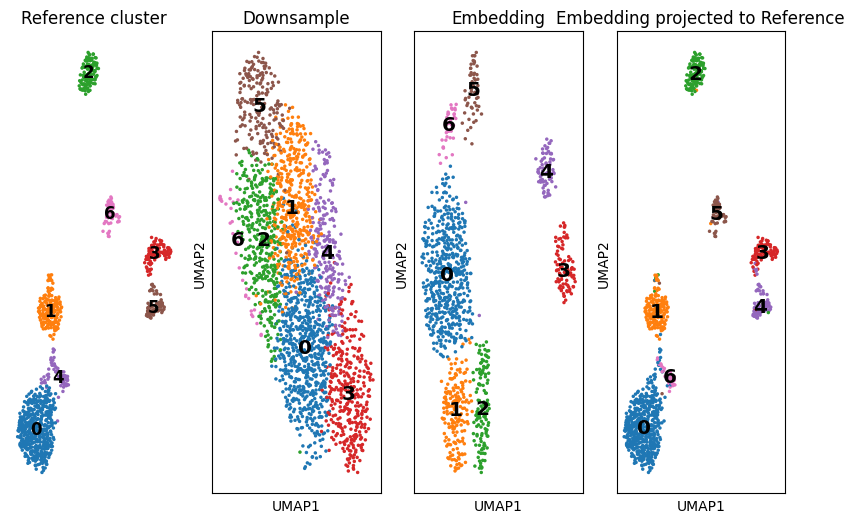

In [11]:
import seaborn as sns
import colorbm as cbm
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))

# 创建 1 行 4 列的子图
fig, axes = plt.subplots(1, 4, figsize=(10, 6))

# 绘制 Reference cluster 图
sc.pl.umap(refAdata, color=[f'leiden'], size=25, ax=axes[0], show=False, 
           title='Reference cluster', legend_loc='on data', legend_fontweight='black', 
           legend_fontsize='large', frameon=False)

# 绘制 downsample 图
sc.pl.umap(sampleAdata, color=[f'leiden'], size=25, ax=axes[1], show=False, 
           title='Downsample', legend_loc='on data', palette=refAdata.uns['leiden_colors'], 
           legend_fontweight='black', legend_fontsize='x-large', frameon=True)

# 绘制 imputeAdata 图
sc.pl.umap(imputeAdata, color=[f'leiden'], size=25, ax=axes[2], show=False, 
           title='Embedding', legend_loc='on data', palette=refAdata.uns['leiden_colors'], 
           legend_fontweight='black', legend_fontsize='x-large', frameon=True)

# 将 imputeAdata 投影回 ref cluster 并绘制
refAdata.obs['imputed_cls'] = imputeAdata.obs[f'leiden']
sc.pl.umap(refAdata, color=['imputed_cls'], size=25, ax=axes[3], show=False, 
           title='Embedding projected to Reference', legend_loc='on data', 
           palette=refAdata.uns['leiden_colors'], legend_fontweight='black', 
           legend_fontsize='x-large', frameon=True)

In [12]:
def generate_impute_adata_with_noise(noise_std=0.1):
    """
    从嵌入文件生成带有高斯噪声的AnnData对象
    
    参数:
        noise_std (float): 高斯噪声的标准差，默认为0.1
        
    返回:
        imputeAdata (AnnData): 处理后的AnnData对象
    """
    # 加载嵌入数据
    imputeemb = np.load(f'baron_human_samp_19264_fromsaver_50M-0.1B-res_tgthighres5_embedding.npy')
    
    # 为每个位置增加高斯噪声
    imputeemb = imputeemb + np.random.normal(0, noise_std, imputeemb.shape)
    
    # 处理维度不一致问题
    imputeemb_df = pd.DataFrame(imputeemb, index=refdf.index[:imputeemb.shape[0]])
    imputeemb_df = imputeemb_df.reindex(refdf.index, fill_value=0)
    
    # 创建AnnData对象
    imputeAdata = sc.AnnData(imputeemb_df)
    
    # 标准化和降维处理
    sc.pp.scale(imputeAdata)
    sc.tl.pca(imputeAdata)
    sc.pp.neighbors(imputeAdata)
    
    # 计算TSNE和UMAP嵌入
    sc.tl.tsne(imputeAdata)
    sc.tl.umap(imputeAdata)
    
    # 聚类分析
    cluster_k_leiden(imputeAdata, numcls)
    
    # 添加参考leiden分类
    imputeAdata.obs['refleiden'] = refAdata.obs['leiden']
    
    return imputeAdata

/home/test/anaconda3/envs/scfoundation/lib/python3.13/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


reference cluster number 7
use resolution 0.8125


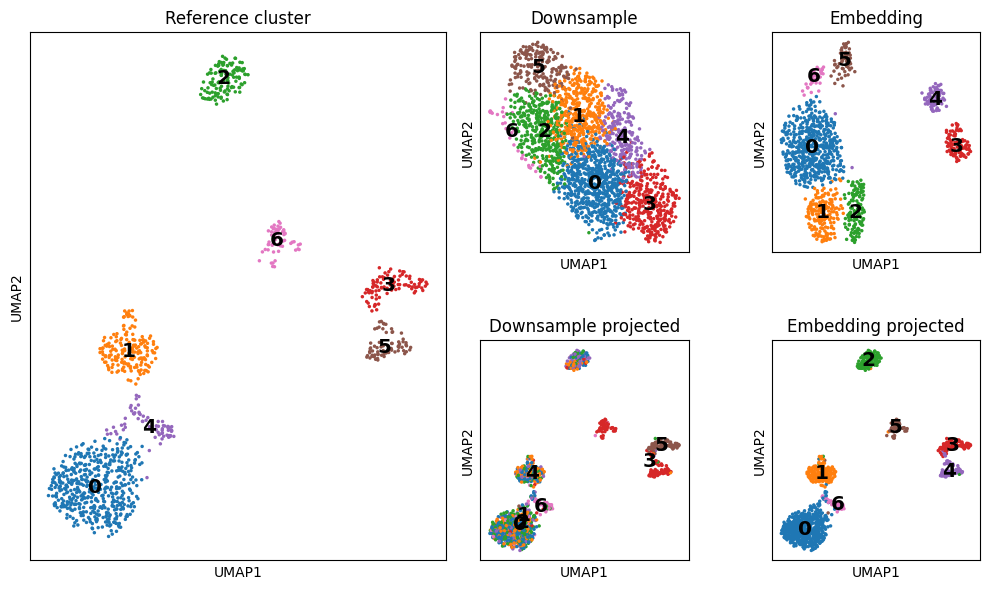

In [15]:
import seaborn as sns
import colorbm as cbm
import matplotlib.gridspec as gridspec
sns.set_palette(sns.color_palette(cbm.pal('npg').as_hex))

# 创建一个包含左右两部分的图表布局
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1.2], figure=fig)

# 左侧大图 - Reference cluster

left_ax = fig.add_subplot(gs[0, 0])
sc.pl.umap(refAdata, color=[f'leiden'], size=25, ax=left_ax, show=False, 
           title='Reference cluster', legend_loc='on data', legend_fontweight='black', 
           legend_fontsize='x-large', frameon=True)

# 右侧2×2网格
right_gs = gridspec.GridSpecFromSubplotSpec(2, 2, subplot_spec=gs[0, 1], wspace=0.4, hspace=0.4)

# 右上1 - Downsample
ax1 = fig.add_subplot(right_gs[0, 0])
sc.pl.umap(sampleAdata, color=[f'leiden'], size=25, ax=ax1, show=False, 
           title='Downsample', legend_loc='on data', palette=refAdata.uns['leiden_colors'], 
           legend_fontweight='black', legend_fontsize='x-large', frameon=True)

# 右上2 - Embedding (imputeAdata)
ax2 = fig.add_subplot(right_gs[0, 1])
sc.pl.umap(imputeAdata, color=[f'leiden'], size=25, ax=ax2, show=False, 
           title='Embedding', legend_loc='on data', palette=refAdata.uns['leiden_colors'], 
           legend_fontweight='black', legend_fontsize='x-large', frameon=True)

# 右下2 - Embedding projected to Reference
ax3 = fig.add_subplot(right_gs[1, 1])
refAdata.obs['imputed_cls'] = imputeAdata.obs[f'leiden']
sc.pl.umap(refAdata, color=['imputed_cls'], size=25, ax=ax3, show=False, 
           title='Embedding projected', legend_loc='on data', 
           palette=refAdata.uns['leiden_colors'], legend_fontweight='black', 
           legend_fontsize='x-large', frameon=True)

# 右下1 - Downsample projected to Reference
ax4 = fig.add_subplot(right_gs[1, 0])
refAdata.obs['downsample_cls'] = generate_impute_adata_with_noise(noise_std=3).obs[f'leiden']
sc.pl.umap(refAdata, color=['downsample_cls'], size=25, ax=ax4, show=False, 
           title='Downsample projected', legend_loc='on data', 
           palette=refAdata.uns['leiden_colors'], legend_fontweight='black', 
           legend_fontsize='x-large', frameon=True)

# 调整布局并保存为SVG格式
plt.tight_layout()
plt.savefig('cluster_comparison.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()